# Simple Text Processing

- Here we retrieve (or download) a text data and examine the order of the appearance of main characters such as Darcy and Jane in the novel 'Pride and Prejudice'.

## References:
- Requests: HTTP for Humans https://docs.python-requests.org/en/master/
- NLTK: https://www.nltk.org/book/ch03.html

## Requests

In [1]:
import requests

In [2]:
r = requests.get('https://api.github.com/events')
r?

Type:        Response
String form: <Response [200]>
File:        c:\users\vip\appdata\local\programs\python\python38\lib\site-packages\requests\models.py
Docstring:  
The :class:`Response <Response>` object, which contains a
server's response to an HTTP request.


In [3]:
r.status_code

200

https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

- 200 OK: Standard response for successful HTTP requests.
    - The actual response will depend on the request method used. 
    - In a GET request, the response will contain an entity corresponding to the requested resource. 
    - In a POST request, the response will contain an entity describing or containing the result of the action.
 
- 4XX client erros
    - This class of status code is intended for situations in which the error seems to have been caused by the client.
    - 400 Bad Request
    - 401 Unauthorized
    - 404 Not Found

In [4]:
r = requests.get('http://stackoverflow.com')
r.status_code

200

In [5]:
r.text[:100]

'<!DOCTYPE html>\r\n\r\n\r\n    <html class="html__responsive html__unpinned-leftnav html__fixed-top-bar">\r'

In [6]:
r = requests.get('http://www.wikipedia.org')
r.status_code

200

In [7]:
r.text[:1000]

'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-e99844f6.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{

In [8]:
r.encoding

'ISO-8859-1'

In [9]:
r = requests.get('http://sogang.ac.kr/index.do')
r.content.decode('utf8')[:1400]

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t<!-- common_head [2016-04-12] -->\r\n\t<meta charset="utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\r\n\t<meta name="viewport" content="width=1400">\r\n\t<link rel="stylesheet" type="text/css" href="/front/styles/reset.css"/>\r\n\t<script type="text/javascript" src="/front/scripts/reset.js"></script>\r\n\t<script type="text/javascript" src="/front/scripts/cssAddRules.js"></script>\r\n\t<link rel="stylesheet" type="text/css" href="/front/styles/common.css?v=20170317"/>\r\n\t<link rel="stylesheet" type="text/css" href="/front/module_sample/header/001/header.css"/>\r\n\t<link rel="stylesheet" type="text/css" href="/front/module_sample/footer/001/footer.css"/>\r\n\t<script type="text/javascript" src="/front/libs/jquery-1.12.3.js"></script>\r\n\t<script type="text/javascript" src="/front/libs/jqu

In [10]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
r = requests.get(url)
r.status_code, r.encoding

(200, 'ISO-8859-1')

In [11]:
r.text[:1000]  # decoded automatically but assumed a wrong encoding of the source

'ï»¿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Crime and Punishment\r\n\r\nAuthor: Fyodor Dostoevsky\r\n\r\nRelease Date: March 28, 2006 [EBook #2554]\r\nLast Updated: October 27, 2016\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***\r\n\r\n\r\n\r\n\r\nProduced by John Bickers; and Dagny\r\n\r\n\r\n\r\n\r\n\r\nCRIME AND PUNISHMENT\r\n\r\nBy Fyodor Dostoevsky\r\n\r\n\r\n\r\nTranslated By Constance Garnett\r\n\r\n\r\n\r\n\r\nTRANSLATORâ\x80\x99S PREFACE\r\n\r\nA few words about Dostoevsky himself may help the English reader to\r\nunderstand his work.\r\n\r\nDostoevsky was the son of a doctor. H

In [12]:
r.content[:100]  # use this to access the raw material

b'\xef\xbb\xbfThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for th'

In [13]:
type(r.content)

bytes

In [14]:
raw = r.content.decode('utf-8')  # and decode it to get a unicode stream
raw[:100]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the '

In [15]:
type(raw), len(raw)

(str, 1176967)

In [16]:
raw[:100]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the '

In [17]:
raw[0], raw[1]

('\ufeff', 'T')

This first character `0xfeff` are called the BOM (Bite Order Mark).
- BOM has no meaning in UTF-8
- The meaning of it here is that the text stream is encoded in UTF-8 or that it was converted to UTF-8 from a stream that contained an optional BOM.
- see https://en.wikipedia.org/wiki/Byte_order_mark

- UTF-8 is an encoding scheme to compress a stream of uncode characters into a file of smaller size for efficient storage. You need to decode it to use in the computer memory in your computer program.

In [18]:
url_koreanTales = "https://gutenberg.org/cache/epub/55539/pg55539.txt"
response = requests.get(url_koreanTales)
raw = response.content
print(type(raw))
raw = raw.decode('utf8')

<class 'bytes'>


In [19]:
raw[:1000]

'\ufeffThe Project Gutenberg EBook of Korean Tales, by Horace Newton Allen\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org/license\r\n\r\n\r\nTitle: Korean Tales\r\n       Being a collection of stories translated from the Korean folk lore\r\n\r\nAuthor: Horace Newton Allen\r\n\r\nRelease Date: September 13, 2017 [EBook #55539]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK KOREAN TALES ***\r\n\r\n\r\n\r\n\r\nProduced by Jeroen Hellingman and the Online Distributed\r\nProofreading Team at http://www.pgdp.net/ for Project\r\nGutenberg (This file was produced from images generously\r\nmade available by The Internet Archive/American Libraries.)\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n                              KOREAN TALES\r\n\r\n              

In [20]:
url = "https://gutenberg.org/files/1342/1342-0.txt"
response = requests.get(url)
raw = response.content
print(type(raw))
raw = raw.decode('utf8')
raw[:200]

<class 'bytes'>


'\ufeffThe Project Gutenberg eBook of Pride and Prejudice, by Jane Austen\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost n'

In [21]:
print(raw[:1000])

﻿The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Pride and Prejudice

Author: Jane Austen

Release Date: June, 1998 [eBook #1342]
[Most recently updated: February 10, 2021]

Language: English

Character set encoding: UTF-8

Produced by: Anonymous Volunteers and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***

THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK
[# 42671 ]

cover




      Pride and Prejudice

      By Jane Austen

       


In [22]:
textlines = raw[1:].split(sep='\r\n')
for i, t in enumerate(textlines[:20]):
    print(i, len(t), t)

0 66 The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen
1 0 
2 69 This eBook is for the use of anyone anywhere in the United States and
3 72 most other parts of the world at no cost and with almost no restrictions
4 70 whatsoever. You may copy it, give it away or re-use it under the terms
5 70 of the Project Gutenberg License included with this eBook or online at
6 67 www.gutenberg.org. If you are not located in the United States, you
7 71 will have to check the laws of the country where you are located before
8 17 using this eBook.
9 0 
10 26 Title: Pride and Prejudice
11 0 
12 19 Author: Jane Austen
13 0 
14 38 Release Date: June, 1998 [eBook #1342]
15 42 [Most recently updated: February 10, 2021]
16 0 
17 17 Language: English
18 0 
19 29 Character set encoding: UTF-8


In [23]:
# remove empty lines
textlines = [t for t in textlines if t != '']

In [24]:
tmp = []
for t in textlines:
    if t != '':
        tmp.append(t)
textlines = tmp

In [25]:
len(textlines)

12156

In [26]:
textlines[-10:]

['editions, all of which are confirmed as not protected by copyright in',
 'the U.S. unless a copyright notice is included. Thus, we do not',
 'necessarily keep eBooks in compliance with any particular paper',
 'edition.',
 'Most people start at our website which has the main PG search',
 'facility: www.gutenberg.org',
 'This website includes information about Project Gutenberg-tm,',
 'including how to make donations to the Project Gutenberg Literary',
 'Archive Foundation, how to help produce our new eBooks, and how to',
 'subscribe to our email newsletter to hear about new eBooks.']

In [27]:
textlines[-10].find('by')

54

In [28]:
'by' in textlines[-10]

True

In [29]:
darcy = []
for i, t in enumerate(textlines):
    if 'Darcy' in t:
        darcy.append(i)  # line number

In [30]:
len(darcy), darcy[:4]

(412, [297, 315, 327, 330])

In [31]:
bingley = []
for i, t in enumerate(textlines):
    if 'Bingley' in t:
        bingley.append(i)  # line number

In [32]:
len(bingley)

309

In [33]:
for b in bingley:
    if b in darcy:
        print(b, textlines[b])

355       Mr. Bingley followed his advice. Mr. Darcy walked off; and
490       strength of Darcy’s regard, Bingley had the firmest reliance, and
492       the superior. Bingley was by no means deficient, but Darcy was
1053       any but him. Miss Bingley was engrossed by Mr. Darcy, her sister
1077       “_You_ observed it, Mr. Darcy, I am sure,” said Miss Bingley;
1088       “I am afraid, Mr. Darcy,” observed Miss Bingley in a half
1163       “Is Miss Darcy much grown since the spring?” said Miss Bingley;
1649       object; Miss Bingley’s eyes were instantly turned toward Darcy,
1668       Darcy took up a book; Miss Bingley did the same; and Mrs. Hurst,
1726       Miss Bingley, however, was incapable of disappointing Mr. Darcy
2226       when the sound of horses drew their notice, and Darcy and Bingley
3720       Bingley tells you her brother greatly admires Miss Darcy, he is
5432       Darcy! It must have been a most agreeable surprise to Mr. Bingley
6340       Darcy, she could not bu

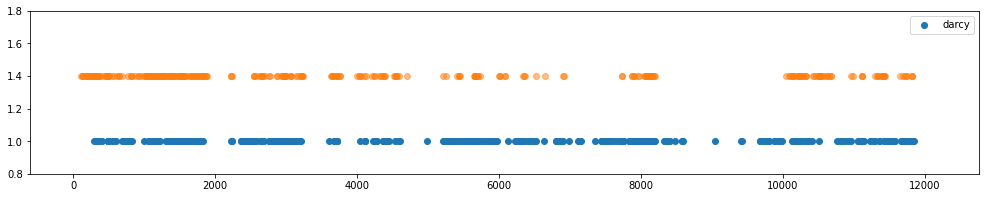

In [34]:
import numpy as np
import matplotlib.pyplot as plt

linenumbers = np.arange(len(textlines))
darcy_come = np.empty_like(linenumbers)
bingley_come = np.empty_like(linenumbers)
for ln in linenumbers:
    if ln in darcy:
        darcy_come[ln] = True
    else:
        darcy_come[ln] = False
        
    if ln in bingley:
        bingley_come[ln] = True
    else:
        bingley_come[ln] = False
#
plt.figure(figsize=(17,3))
plt.scatter(linenumbers, darcy_come, label='darcy')  # mark the lines of darcy
plt.scatter(linenumbers, bingley_come*1.4, alpha=.5);  # mark the lines of bingley
plt.legend()
plt.ylim([.8, 1.8]);

So, Bingley appears first in the novel before Darcy comes.

In [35]:
sum(darcy_come)

412

Now we make a transition table that shows the order of appearances.

In [36]:
raw[:50]  # the whole string 

'\ufeffThe Project Gutenberg eBook of Pride and Prejudic'

In [37]:
raw[:50].split()  # split the sting to a list of separate words

['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Pride',
 'and',
 'Prejudic']

In [38]:
# a string given for test
s = 'Darcy loves not Jane and Bingley is kind to Elizabeth. Good.'

In [39]:
# name of the characters of interest
ks = ['Darcy', 'Bingley', 'Jane', 'Elizabeth']

In [40]:
chars = []
for w in s.split():
    print(f'w: {w:10}', end='')
    if w in ks:
        chars.append(w)
        print(' came')
    else:
        print(' not')

w: Darcy      came
w: loves      not
w: not        not
w: Jane       came
w: and        not
w: Bingley    came
w: is         not
w: kind       not
w: to         not
w: Elizabeth. not
w: Good.      not


In [41]:
chars = []  # the list of the character names appearing in order
for w in raw.split():
    if w in ks:
        chars.append(w)

In [42]:
chars[:20]

['Jane',
 'Jane',
 'Jane',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Bingley',
 'Darcy',
 'Bingley',
 'Darcy',
 'Elizabeth',
 'Darcy',
 'Bingley']

In [43]:
# initialize the transition map
t = {w: { w: 0 for w in ks } for w in ks}
t

{'Darcy': {'Darcy': 0, 'Bingley': 0, 'Jane': 0, 'Elizabeth': 0},
 'Bingley': {'Darcy': 0, 'Bingley': 0, 'Jane': 0, 'Elizabeth': 0},
 'Jane': {'Darcy': 0, 'Bingley': 0, 'Jane': 0, 'Elizabeth': 0},
 'Elizabeth': {'Darcy': 0, 'Bingley': 0, 'Jane': 0, 'Elizabeth': 0}}

In [44]:
def printt(T):
    for k in T.keys():
        ii = T[k]
        print(f'{k:10}', end=' -> ')
        for kii in ii.keys():
            print(kii, T[k][kii], end='  ')
        print()

In [45]:
printt(t)

Darcy      -> Darcy 0  Bingley 0  Jane 0  Elizabeth 0  
Bingley    -> Darcy 0  Bingley 0  Jane 0  Elizabeth 0  
Jane       -> Darcy 0  Bingley 0  Jane 0  Elizabeth 0  
Elizabeth  -> Darcy 0  Bingley 0  Jane 0  Elizabeth 0  


In [46]:
# Now count the number of appearance: A->B
for i, c in enumerate(chars[:-1]):  # in order of the appearance
    t[c][chars[i+1]] += 1

In [47]:
printt(t)

Darcy      -> Darcy 67  Bingley 40  Jane 18  Elizabeth 89  
Bingley    -> Darcy 38  Bingley 37  Jane 33  Elizabeth 41  
Jane       -> Darcy 25  Bingley 25  Jane 36  Elizabeth 68  
Elizabeth  -> Darcy 85  Bingley 47  Jane 66  Elizabeth 200  


In [48]:
ks2 = ['Darcy', 'Bingley', 'Jane', 'Elizabeth', 'Charlotte']

In [49]:
t2 = {w: { w: 0 for w in ks2 } for w in ks2}

In [50]:
chars2 = []
for w in raw.split():
    if w in ks2:
        chars2.append(w)

In [51]:
for i, c in enumerate(chars2[:-1]):  # in order of the appearance
    t2[c][chars2[i+1]] += 1

In [52]:
printt(t2)

Darcy      -> Darcy 65  Bingley 40  Jane 17  Elizabeth 87  Charlotte 5  
Bingley    -> Darcy 38  Bingley 37  Jane 33  Elizabeth 41  Charlotte 0  
Jane       -> Darcy 25  Bingley 25  Jane 31  Elizabeth 68  Charlotte 5  
Elizabeth  -> Darcy 83  Bingley 46  Jane 65  Elizabeth 179  Charlotte 25  
Charlotte  -> Darcy 4  Bingley 1  Jane 7  Elizabeth 23  Charlotte 12  


# Korean

In [63]:
import os
from pathlib import Path  # very much useful when dealing with files and directories

In [64]:
path = Path('.')  # current directory

In [65]:
print(path.cwd())

D:\git\imsi


In [66]:
print(os.listdir(path))

['.ipynb_checkpoints', '2021010COR1009_14.csv', '4april.py', 'Aliens (1986) Trailer #1 _ Movieclips Classic Trailers-oSeQQlaCZgU.mp4', 'audio.aac', 'audio.wav', 'audio_video.ipynb', 'barcode.png', 'Bertrand_box_paradox.ipynb', "Bram Stoker's Dracula - Official® Trailer [HD]-fgFPIh5mvNc.mp4", 'dir', 'dna.py', 'exclamation.py', 'file_io.py', 'hamming_number.py', 'hello.ipynb', 'hello.py', 'hue_shift.mp4', 'hue_shift2.mp4', 'hue_shift_long.mp4', 'image-negative.png', 'intro_ball.gif', 'kjae-68-540_ko.pdf', 'light_demo.py', 'makinggames.zip', 'May17.ipynb', 'mid_exam.ipynb', 'mid_exam.pdf', 'myexer.py', 'mypython.py', 'output.avi', 'outputttt.mp4', 'paul.py', 'playgame.py', 'pride.py', 'problems.py', 'pygame_makinggames.pdf', 'PythonDataScienceHandbook', 'requests_http.ipynb', 'seven.ipynb', 'Star Trek - The Motion Picture (1979) Trailer #1 _ Movieclips Classic Trailers-wbvxV2OJQKk.mp4', 'street_720.mp4', 'ta.ipynb', 'textprocessing.ipynb', 'train.csv', 'Untitled.ipynb', 'Untitled1.ipynb',

In [68]:
os.path.isdir(path/'영웅문')

True

In [69]:
os.listdir(path/'영웅문')

['영웅문_1부(사조영웅전)', '영웅문_2부(신조협려)', '영웅문_3부(의천도룡기)']

In [70]:
os.listdir(path/'영웅문/영웅문_3부(의천도룡기)/')

['.ipynb_checkpoints', '의천도룡기.txt']

In [71]:
filename = path/'영웅문/영웅문_3부(의천도룡기)/의천도룡기.txt'

In [72]:
f = open(filename, 'r')
textlines = f.readlines()
f.close()

UnicodeDecodeError: 'cp949' codec can't decode byte 0xbf in position 2: illegal multibyte sequence

In [62]:
filename = path/'영웅문/영웅문_3부(의천도룡기)/의천도룡기.txt'
with open(filename, 'r') as f:
    textlines = f.readlines()

UnicodeDecodeError: 'cp949' codec can't decode byte 0xbf in position 2: illegal multibyte sequence

In windows 10, my python3.8 assumed that the file is encoded with `cp949` encoding scheme.

I need to specify the encoding scheme specifically.

In [73]:
with open(filename, 'r', encoding='utf-8') as f:
    textlines = f.readlines()

In [74]:
textlines[:11]

['\ufeff\n',
 ' 의천도룡기(倚天屠龍記) 제 1 권\n',
 '\n',
 '\n',
 ' 제 1 장 묘령(妙齡)의 낭자와 곤륜삼성(崑崙三聖) \n',
 '\n',
 ' 화창한 봄날\n',
 ' 해마다 맞는 한식(寒食)\n',
 ' 배꽃의 계절이어라.\n',
 ' 흰 비단결처럼 활짝 핀 저 꽃은 진정 향기롭거니와\n',
 ' 잎새 무성함은 백설과 같도다.\n']

In [75]:
textlines[1000:1010]

[' 곽양은 은근히 호기심이 생겼다. 곤륜삼성이 어떠한 인물이며, 소림을 찾아와 \n',
 '무공을 겨루게 되면 과연 승부가 어떻게 판가름날지 자못 궁금했다. 하지만, 여\n',
 '인은 소림사로 들어갈 수 없으니 이 흥미진진한 구경을 직접 보지는 못할 것이\n',
 '다.\n',
 ' 무색선사는 그녀가 생각에 잠겨 있는 것을 보고, 소림을 위해 대책을 강구 중\n',
 '인 것으로 알고 얼른 입을 열었다.\n',
 '\n',
 ' "소림은 천 년 동안 숱한 풍파를 겪어 왔네. 곤륜삼성이 제 아무리 뛰어난 무\n',
 '공을 지녔다 해도, 소림이란 천년고송 앞에 무릎을 꿇게 될 걸세. 보름후쯤 강호\n',
 '의 풍문을 귀담아 들어보면 자연히 알게 될 걸세."\n']

In [76]:
# just remove empty lines
tlines = []
for s in textlines:
    if s != '\n':
        tlines.append(s)
#
textlines = tlines

textlines[:11]

['\ufeff\n',
 ' 의천도룡기(倚天屠龍記) 제 1 권\n',
 ' 제 1 장 묘령(妙齡)의 낭자와 곤륜삼성(崑崙三聖) \n',
 ' 화창한 봄날\n',
 ' 해마다 맞는 한식(寒食)\n',
 ' 배꽃의 계절이어라.\n',
 ' 흰 비단결처럼 활짝 핀 저 꽃은 진정 향기롭거니와\n',
 ' 잎새 무성함은 백설과 같도다.\n',
 ' 조용한 밤.\n',
 ' 차가운 달빛에 젖어\n',
 ' 그 찬란한 빛을 뿌리니\n']

In [77]:
textlines[13000:13010]

[' 정민군은 기다렸다는 듯이 즉시 대답을 했다.\n',
 ' "네. 기사매, 우리 문중에 세 번째 금기가 무엇이지?"\n',
 ' 기효부는 대답하지 않을 수 없었다.\n',
 ' "음사방탕(淫邪放蕩)입니다."\n',
 ' "맞았어. 그럼 여섯 번째 금기는 무엇이지?"\n',
 ' "사문에 대한 배신 행위입니다."\n',
 ' "그 계율을 어기는 자는 어떤 벌을 받아야 하지?"\n',
 ' 기효부는 그녀의 물음에 답하지 않고 멸절사태를 향해 말했다.\n',
 ' "스승님, 제자에게 말하기 어려운 고충이 있습니다. 정사저께서 \n',
 '스승님께 말씀드린 것과는 다릅니다."\n']

In [78]:
# let's remove the newline character '\n'
textlines = [s.strip() for s in textlines]

textlines[1000:1010]

['"어느 고인인지는 몰라도 가르침을 주어 고맙습니다."',
 '이렇게 말하며 곽양이 몸을 숨기고 있는 쪽을 향해 포권의 예를 취했다.',
 '곽양은 비로소 상대방의 얼굴을 똑똑히 볼 수 있었다. 얼굴은 길쭉한 편이며,',
 '패인 두 눈에선 날카로운 광채가 번뜩였다. 몸집은 깡마른데다 나이는 서른 정도',
 '로 보였다.',
 '곽양은 본디 성격이 호방하며 남녀유별을 무시한 채 당당히 앞으로 걸어나가',
 '입가에 미소를 띄고 말했다.',
 '"조금 전에 귀하의 신곡에 이끌려 이곳까지 오게 되었는데, 또 다시 흑백교전',
 '(黑白交戰)에 넋을 빼앗겨 무례하게도 훈수를 두게 되었으니 너그러이 양해해 주',
 '십시요."']

In [79]:
main_chars = ['장무기', '조민', '주지약', '은소소', '양불회']

Korean sentences are different from English and mostly name comes with a suffix or an ending.

In [80]:
w = '장무기는'
w.find('장무기'), w.find('은소소')

(0, -1)

In [81]:
where = {name: [] for name in main_chars}

In [83]:
where

{'장무기': [], '조민': [], '주지약': [], '은소소': [], '양불회': []}

In [86]:
for line_number, line in enumerate(textlines):
    for name in main_chars:
        if name in line: # the line contains the name?
            where[name].append(line_number)

In [87]:
where

{'장무기': [5690,
  9273,
  9280,
  9799,
  9806,
  9820,
  10014,
  10015,
  10016,
  10021,
  10026,
  10027,
  10096,
  10101,
  10104,
  10109,
  10175,
  10180,
  10195,
  10199,
  10212,
  10218,
  10232,
  10233,
  10236,
  10245,
  10246,
  10266,
  10267,
  10284,
  10290,
  10303,
  10596,
  10610,
  10614,
  10647,
  10663,
  10673,
  10696,
  10707,
  10721,
  10727,
  10739,
  10742,
  10769,
  10781,
  10788,
  10793,
  10799,
  10823,
  10838,
  10858,
  10861,
  10866,
  10890,
  10892,
  10902,
  10914,
  10915,
  10924,
  10933,
  10936,
  10938,
  10946,
  10948,
  10949,
  10962,
  10971,
  10976,
  10983,
  10985,
  10987,
  10990,
  10995,
  11002,
  11003,
  11007,
  11009,
  11017,
  11020,
  11028,
  11032,
  11038,
  11047,
  11049,
  11065,
  11080,
  11086,
  11090,
  11093,
  11096,
  11098,
  11104,
  11114,
  11119,
  11124,
  11137,
  11140,
  11150,
  11160,
  11169,
  11175,
  11178,
  11182,
  11209,
  11213,
  11216,
  11315,
  11575,
  11585,
  11738,


In [89]:
where['장무기']

[5690,
 9273,
 9280,
 9799,
 9806,
 9820,
 10014,
 10015,
 10016,
 10021,
 10026,
 10027,
 10096,
 10101,
 10104,
 10109,
 10175,
 10180,
 10195,
 10199,
 10212,
 10218,
 10232,
 10233,
 10236,
 10245,
 10246,
 10266,
 10267,
 10284,
 10290,
 10303,
 10596,
 10610,
 10614,
 10647,
 10663,
 10673,
 10696,
 10707,
 10721,
 10727,
 10739,
 10742,
 10769,
 10781,
 10788,
 10793,
 10799,
 10823,
 10838,
 10858,
 10861,
 10866,
 10890,
 10892,
 10902,
 10914,
 10915,
 10924,
 10933,
 10936,
 10938,
 10946,
 10948,
 10949,
 10962,
 10971,
 10976,
 10983,
 10985,
 10987,
 10990,
 10995,
 11002,
 11003,
 11007,
 11009,
 11017,
 11020,
 11028,
 11032,
 11038,
 11047,
 11049,
 11065,
 11080,
 11086,
 11090,
 11093,
 11096,
 11098,
 11104,
 11114,
 11119,
 11124,
 11137,
 11140,
 11150,
 11160,
 11169,
 11175,
 11178,
 11182,
 11209,
 11213,
 11216,
 11315,
 11575,
 11585,
 11738,
 11779,
 11984,
 12180,
 12190,
 12194,
 12196,
 12203,
 12218,
 12227,
 12230,
 12237,
 12245,
 12248,
 12250,
 12262

In [88]:
for name in main_chars:
    print(name, len(where[name]))

장무기 8306
조민 2068
주지약 1598
은소소 846
양불회 322


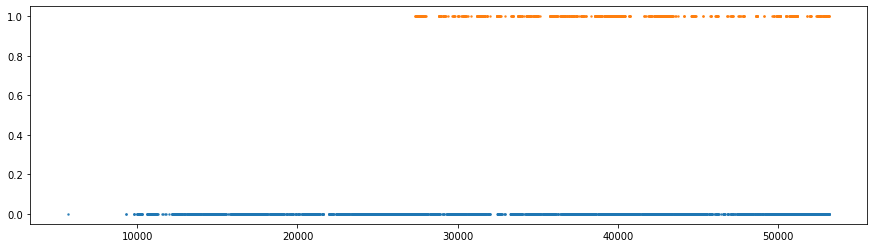

In [91]:
plt.figure(figsize=(15,4))
plt.scatter(where['장무기'], [0]*len(where['장무기']), s=2, alpha=.5)
plt.scatter(where['조민'], [1]*len(where['조민']), s=2, alpha=.5);

{'장무기': 0, '조민': 1, '주지약': 2, '은소소': 3, '양불회': 4}


C:\Users\VIP\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python38\

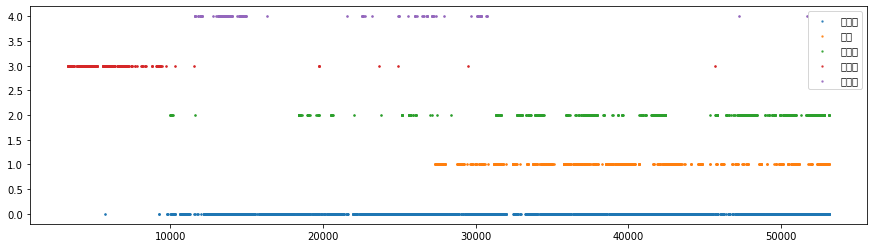

In [92]:
name_id = { name: i for i, name in enumerate(main_chars) }
print(name_id)

plt.figure(figsize=(15,4))
for name in main_chars:
    plt.scatter(where[name], [name_id[name]]*len(where[name]), s=2, alpha=.75, label=name)
#
plt.legend();

Korean characters do not come from default `matplotlib` setting.

We need to set default font for plotting.

In [93]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


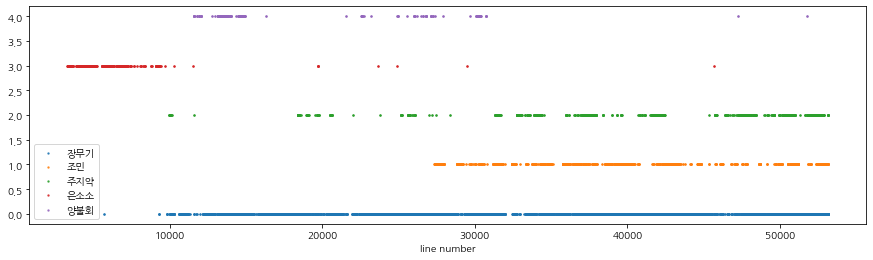

In [94]:
plt.figure(figsize=(15,4))
for name in main_chars:
    plt.scatter(where[name], [name_id[name]]*len(where[name]), s=2, alpha=.75, label=name)
#
plt.xlabel('line number')
plt.legend();

Now let's find the appearance of the names in order in the whole novel.

In [95]:
name_appearance = []
ii = 0
for line in textlines:
    for w in line.split():  # for every word
        ii += 1
#         print(ii, w)
        for name in main_chars:
            if name in w: # the word contains the name?
                name_appearance.append(name)
                break

In [96]:
len(name_appearance), name_appearance[:4]

(6685, ['은소소', '은소소', '은소소', '은소소'])

In [97]:
name_appearance[:10]

['은소소', '은소소', '은소소', '은소소', '은소소', '은소소', '은소소', '은소소', '은소소', '은소소']

In [98]:
name_id

{'장무기': 0, '조민': 1, '주지약': 2, '은소소': 3, '양불회': 4}

In [99]:
name_app_in_id = [name_id[name] for name in name_appearance]
name_app_in_id[:10]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [100]:
colors = np.array(['r', 'g', 'b', 'c', 'm'])
colors[name_app_in_id]

array(['c', 'c', 'c', ..., 'g', 'b', 'r'], dtype='<U1')

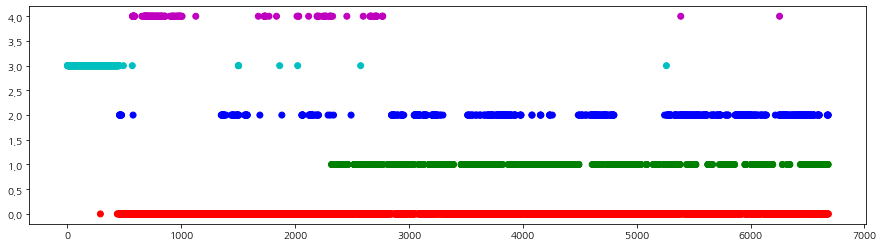

In [101]:
plt.figure(figsize=(15,4))
plt.scatter(x = np.arange(len(name_app_in_id)), 
            y = name_app_in_id,
            color = colors[name_app_in_id]
           );

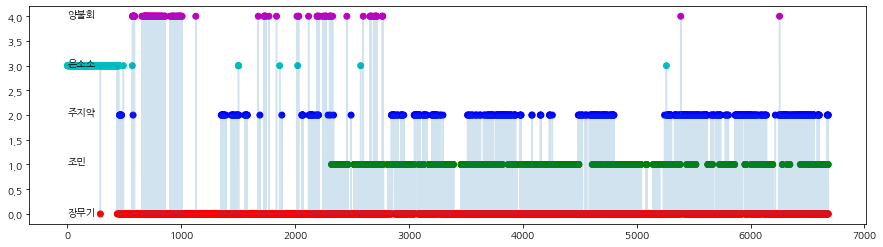

In [102]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(len(name_app_in_id)), 
         name_app_in_id, alpha=.2)
plt.scatter(x = np.arange(len(name_app_in_id)), 
            y = name_app_in_id,
            color = colors[name_app_in_id]
           )
for i, name in enumerate(main_chars):
    plt.text(0, i, name)

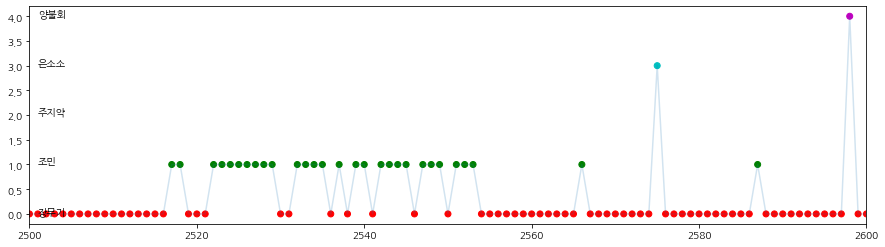

In [103]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(len(name_app_in_id)), 
         name_app_in_id, alpha=.2)
plt.scatter(x = np.arange(len(name_app_in_id)), 
            y = name_app_in_id,
            color = colors[name_app_in_id]
           )
for i, name in enumerate(main_chars):
    plt.text(2501, i, name)
plt.xlim([2500,2600]);

In [ ]:
n = len(main_chars)
Tmatrix = np.zeros((n,n), dtype=int); Tmatrix

In [ ]:
for i in range(2500, len(name_appearance)-1):
    from_name = name_appearance[i]
    to_name = name_appearance[i+1]
    print(i, from_name, to_name)
    if i > 2520: break

In [ ]:
for i in range(len(name_appearance)-1):
    from_name = name_appearance[i]
    to_name = name_appearance[i+1]
    from_id = name_id[from_name]
    to_id = name_id[to_name]
    Tmatrix[from_id, to_id] += 1  # compute frequency
#
Tmatrix

In [ ]:
cntsum = Tmatrix.sum(axis=1)
cntsum

In [ ]:
Tmatrix[0,:] / cntsum[0]

In [ ]:
Pmatrix = np.zeros_like(Tmatrix, dtype=float)
for i in range(5):
    for j in range(5):
        Pmatrix[i,j] = Tmatrix[i,j] / float(cntsum[i])

In [ ]:
print(main_chars)
Pmatrix

According to the transition probability matrix,

1. The rate from 장무기 to 장무기 is highest. He is very selfish.
2. The second highest rate is from 장무기 to 조민. So he must be a serious thing 조민 compared to others.
3. 조민's highest priority is 장무기. 
4. 주지약's highest priority is again 장무기.
5. If it is 주지약 currently, then it will be 장무기 with 52% of chance, 주지약 with 39%, 조민 with 9%, and 양불회 with .2%.

### Choose your own favorate and do analysis.